In [28]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axes as axis

In [2]:
def normalize(fold_data,icount_data): #creating function for normalizing folded pulse data
    
    norm_data = np.zeros_like(fold_data) #initializing array for normalized data
    
    for i in range(len(fold_data[:,:,:])): #looping over how ever many itterations within the folded data necessary to fill norm_data
        norm_data[:,:,:,i] = fold_data[:,:,:,i]/icount_data[:,:,:] #normalizing data
    
    return norm_data

In [3]:
def new_norm(fold_data,icount_data): #creating function for normalizing folded pulse data
    
    norm_data = np.zeros_like(icount_data) #initializing array for normalized data
    norm_data = fold_data[:,:,:,0]/icount_data[:,:,:] #normalizing data
    
    return norm_data

In [70]:
start = "arochime-invpfbB0329+54_32768chan3ntbin"
fold = "foldspec_2018-08-16T10:"
icount = "icount_2018-08-16T10:"
end = ".000+30.000000000000004sec"
    
data1 = np.load(start+fold+str(38)+":"+str(30)+end+".npy")
data2 = np.load(start+icount+str(38)+":"+str(30)+end+".npy")

In [200]:
def plotting(folded_data, norm_data,j,plot_size):
    for i in range(len(folded_data)):
        plt.figure(figsize=(plot_size,plot_size))
        plt.imshow(norm_data[i,:,:],cmap='viridis',aspect='auto')
        plt.yticks(range(0,32768,500))
        plt.colorbar()
        plt.xlabel('Phase', size='20')
        plt.ylabel('Frequency', size='20')
        plt.savefig('Figure_'+str(j)+'.'+str(i)+'.png')

In [199]:
def mask_bands(data):
    i = 0
    l = 0
    m = 0
    for h in range(len(data[:,0,0])):
        for k in range(len(data[0,0,:])):
            for j in range(len(data[0,:,0])):
                if (i >= 10500 and i <= 11700) or (i >= 13500 and i <= 14000) or (i >= 15000 and i <= 15500):
                    data[m,i,l] = 0
                    i = i+1
                else:
                    i = i+1
            i=0
            l=l+1
        i=0
        l=0
        m = m+1
    return data

def mask_bands_specific(data,low_1,high_1,low_2,high_2,low_3,high_3):
    i = 0
    l = 0
    m = 0
    for h in range(len(data[:,0,0])):
        for k in range(len(data[0,0,:])):
            for j in range(len(data[0,:,0])):
                if (i >= low_1 and i <= high_1) or (i >= low_2 and i <= high_2) or (i >= low_3 and i <= high_3):
                    data[m,i,l] = 0
                    i = i+1
                else:
                    i = i+1
            i=0
            l=l+1
        i=0
        l=0
        m = m+1
    return data

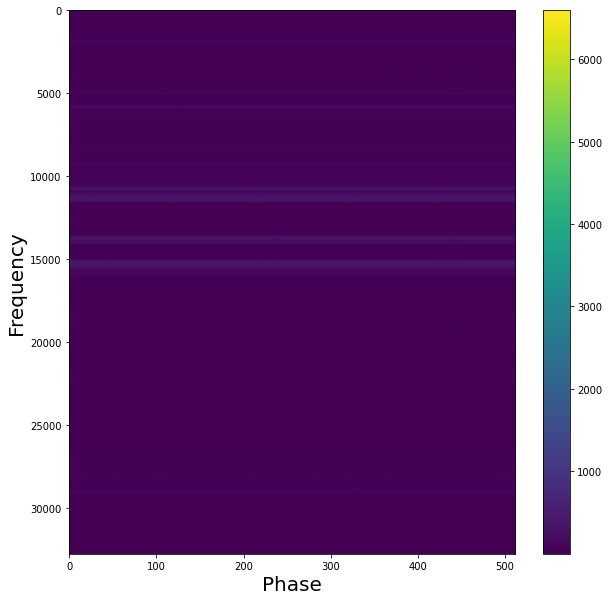

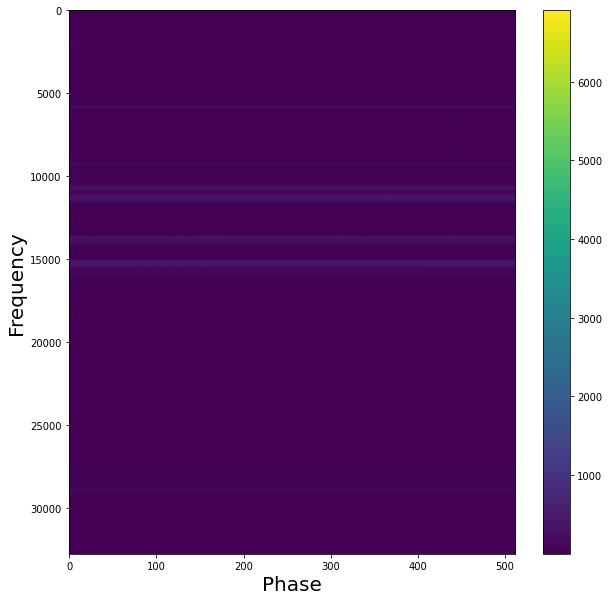

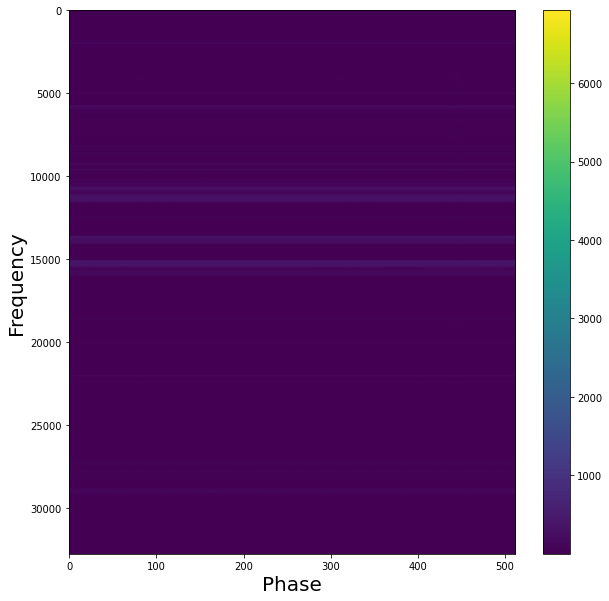

In [82]:
j=0
data_fold_1 = np.load(start+fold+str(47)+":"+str(30)+end+".npy")
data_count_1 = np.load(start+icount+str(47)+":"+str(30)+end+".npy")
norm_data_1 = new_norm(data_fold_1,data_count_1)
plotting(data_fold_1,norm_data_1,j,10)

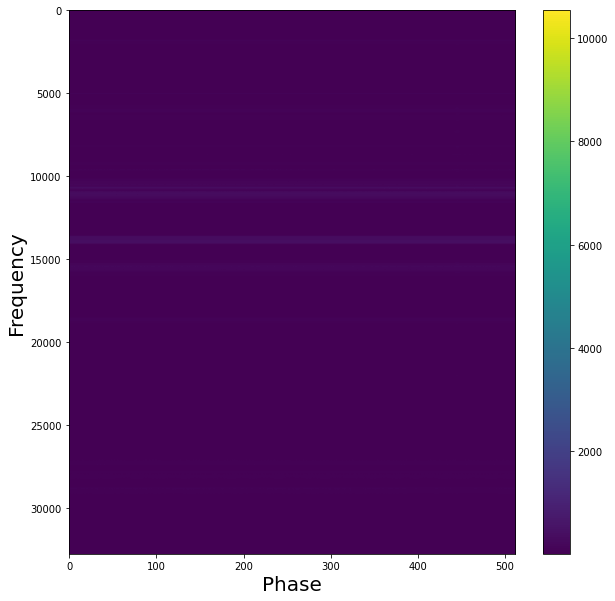

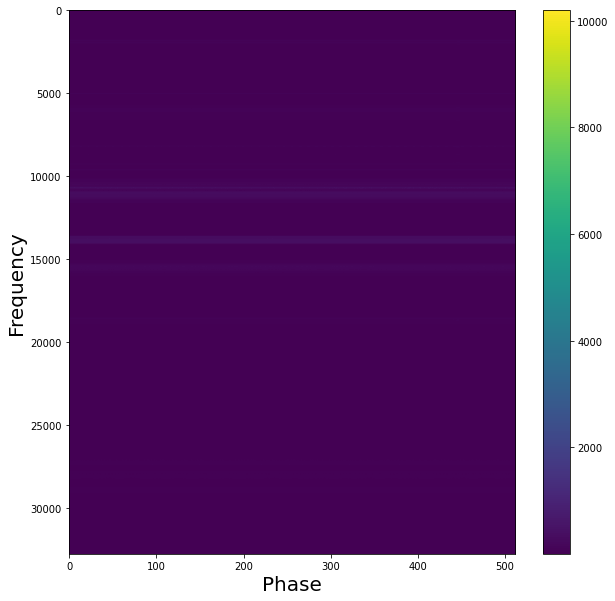

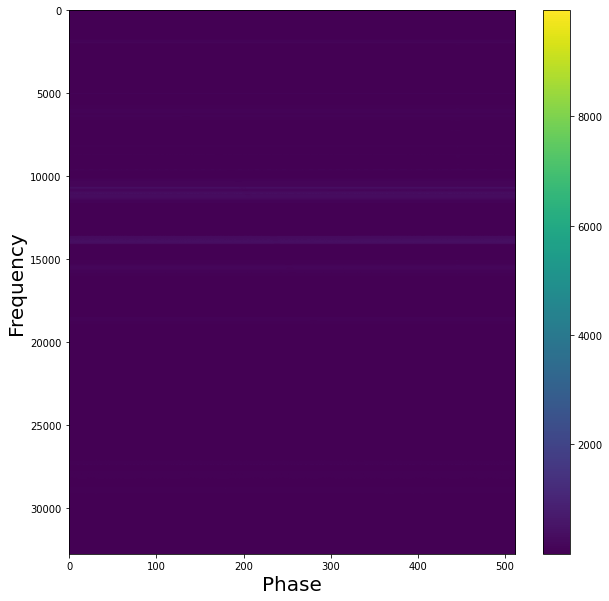

In [76]:
j=1
data_fold_1 = np.load(start+fold+str(53)+":00"+end+".npy")
data_count_1 = np.load(start+icount+str(53)+":00"+end+".npy")
norm_data_1 = new_norm(data_fold_1,data_count_1)
plotting(data_fold_1,norm_data_1,j,10)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.2 µs


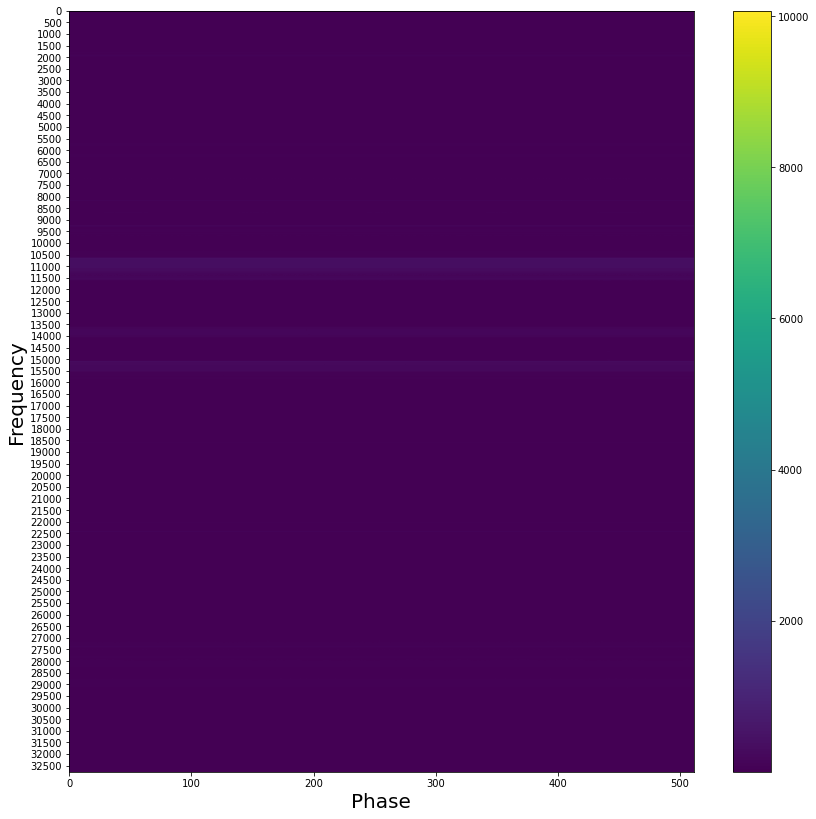

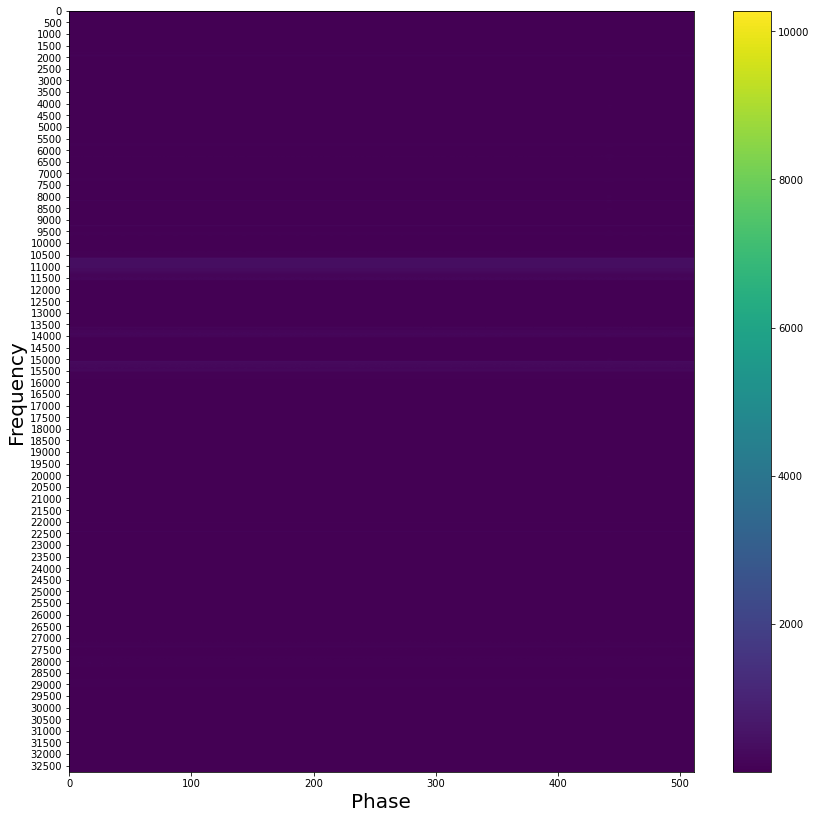

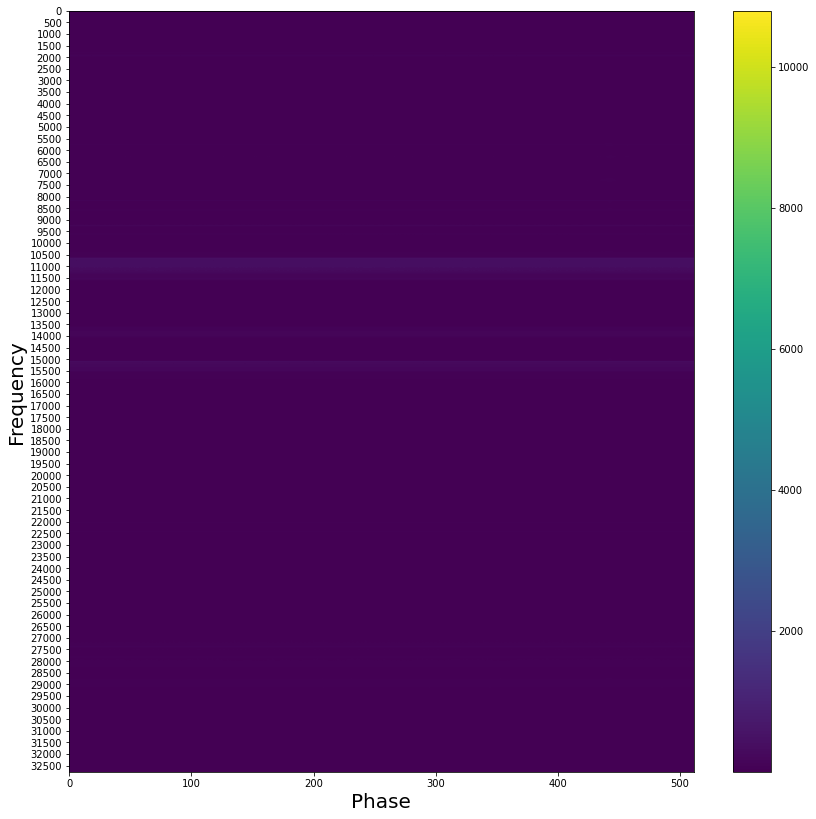

In [158]:
normalized_new_data = new_norm(data1,data2)

squarelen = 14
for i in range(len(data1)):
    plt.figure(figsize=(squarelen,squarelen))
    plt.imshow(normalized_new_data[i,:,:],cmap='viridis',aspect='auto')
    plt.colorbar()
    plt.yticks(range(0,32768,500))
    plt.xlabel('Phase', size='20')
    plt.ylabel('Frequency', size='20')
    plt.savefig('figure1.'+str(i)+'.png')
%time


512
512
512
3
0.0
0.0
0.0
0.0
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs


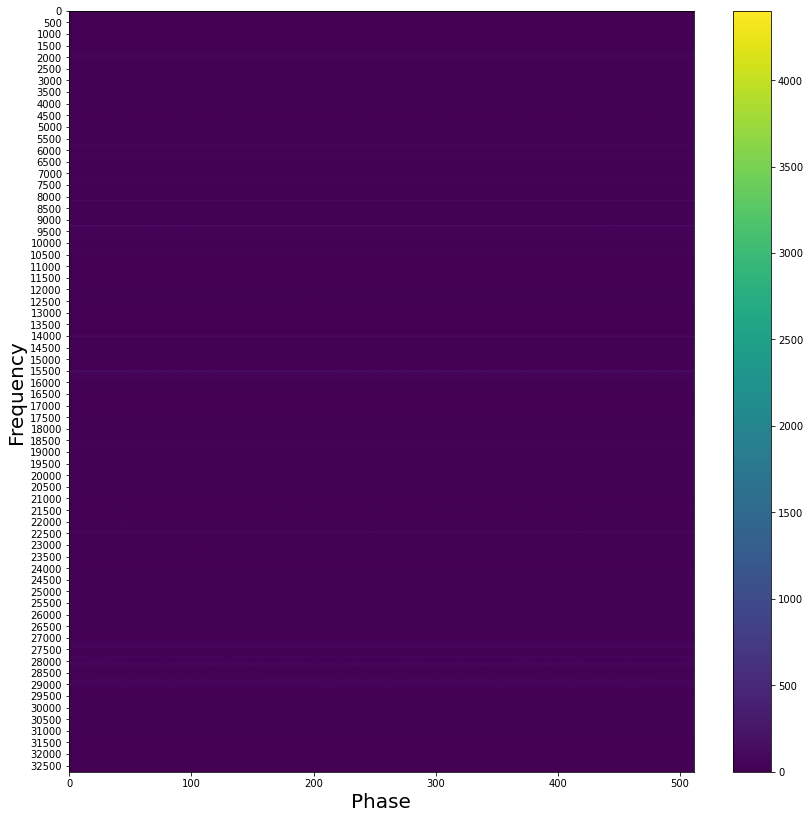

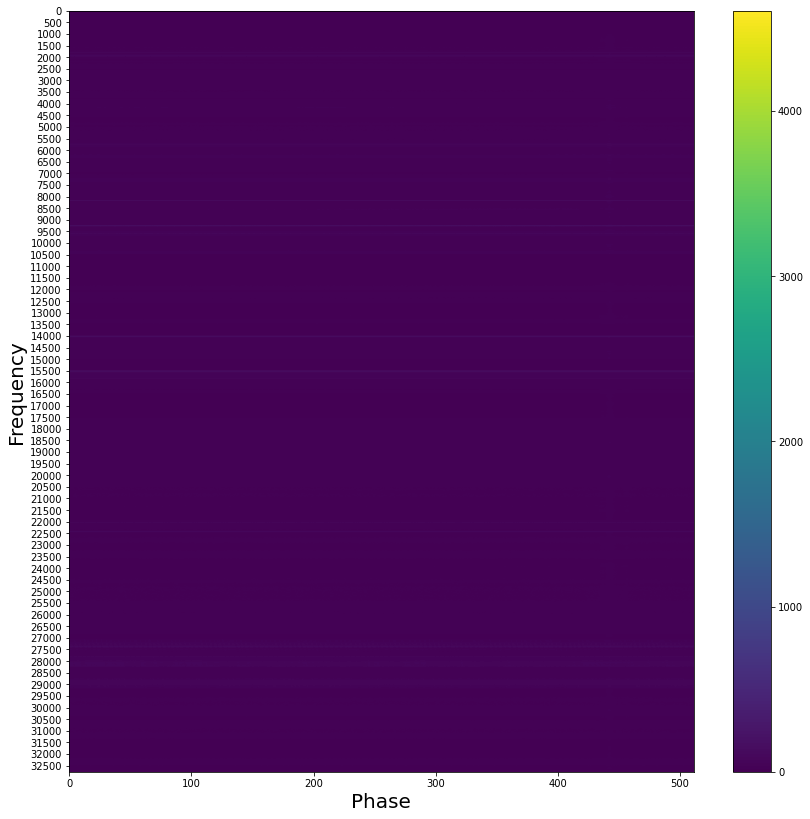

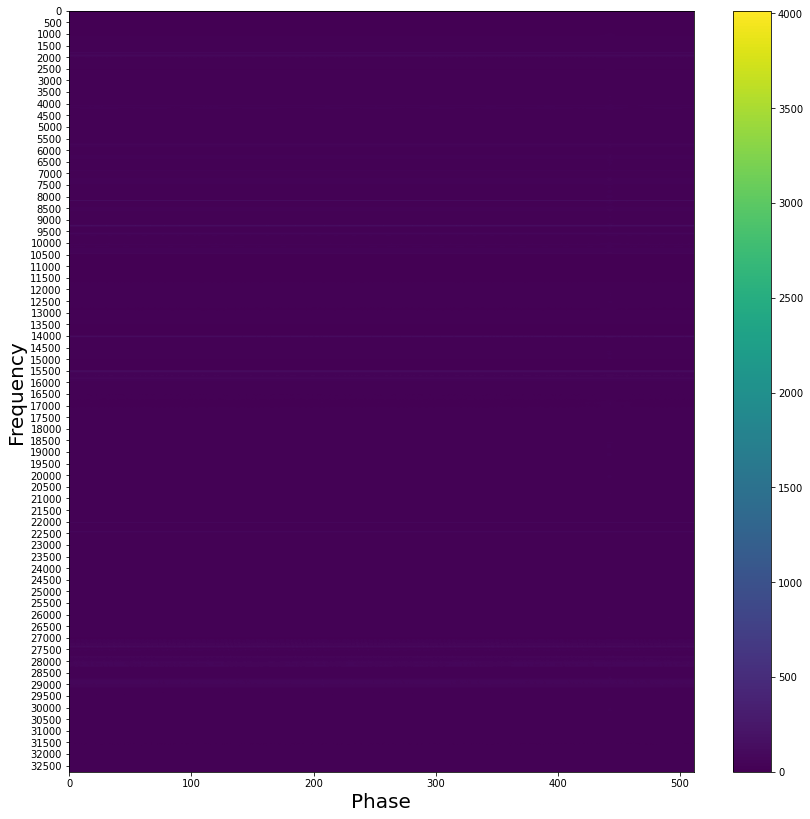

In [192]:
n1 = mask_bands(new_norm(data1,data2))
print(n1[0,10509,0])
print(n1[0,10509,1])
print(n1[0,10509,511])
print(n1[1,10509,511])
squarelen = 14
for i in range(len(data1)):
    plt.figure(figsize=(squarelen,squarelen))
    plt.imshow(n1[i,:,:],cmap='viridis',aspect='auto')
    plt.colorbar()
    plt.yticks(range(0,32768,500))
    plt.xlabel('Phase', size='20')
    plt.ylabel('Frequency', size='20')
    plt.savefig('figure1.'+str(i)+'.png')
%time


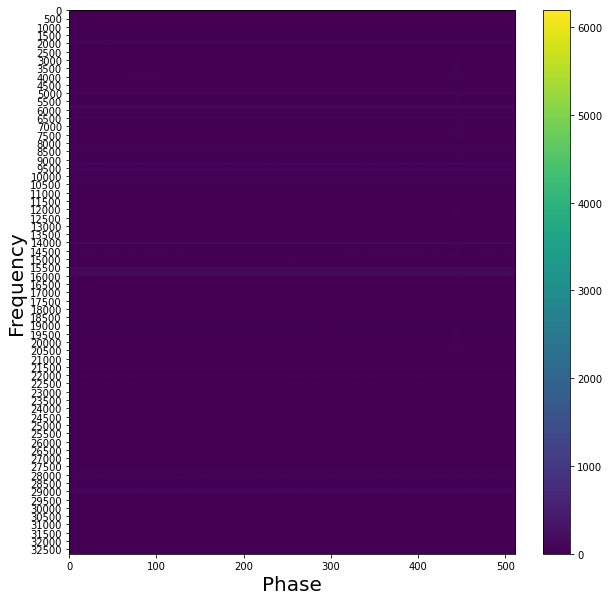

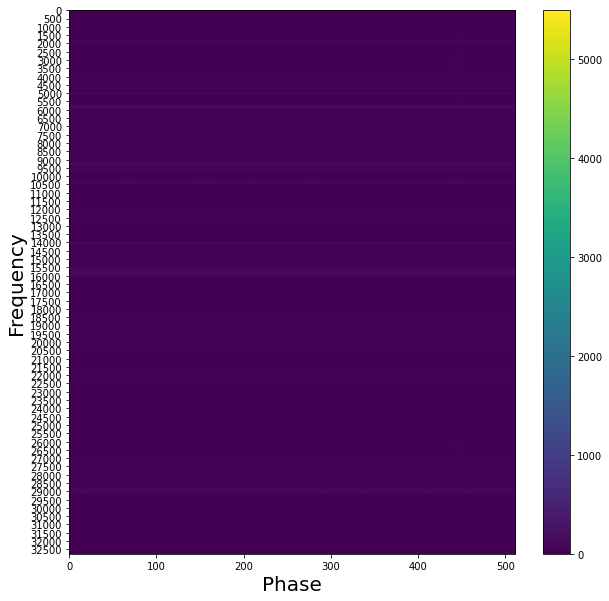

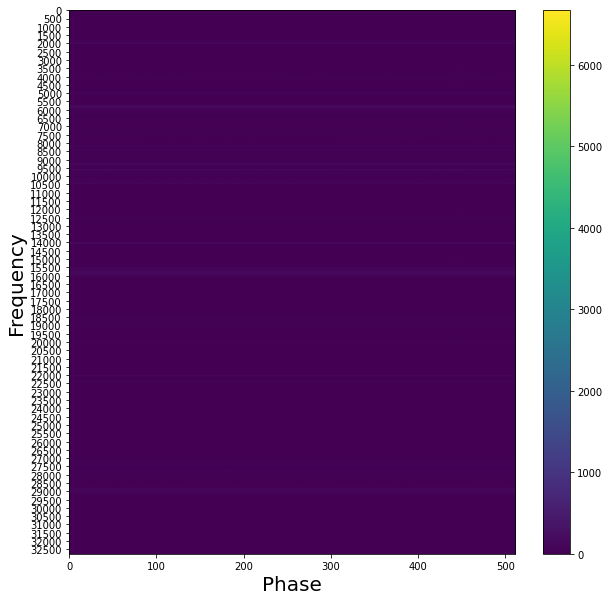

In [198]:
j=0
data_fold_2 = np.load(start+fold+str(47)+":"+str(30)+end+".npy")
data_count_2 = np.load(start+icount+str(47)+":"+str(30)+end+".npy")
norm_data_2 = mask_bands(new_norm(data_fold_2,data_count_2))
plotting(data_fold_1,norm_data_2,j,10)

In [187]:
normalized_new_data = new_norm(data1,data2)

n2 = mask_bands(normalized_new_data)


# plt.figure(figsize=(squarelen,squarelen))
# plt.imshow(normalized_new_data[i,:,:],cmap='viridis',aspect='auto')
# plt.colorbar()
# plt.yticks(range(0,32768,500))
# plt.xlabel('Phase', size='20')
# plt.ylabel('Frequency', size='20')
# plt.savefig('figure1.'+str(i)+'.png')



512
512
512
3
0.0
0.0
0.0


In [ ]:
normalized_new_data = new_norm(data1,data2)
squarelen = 14
for i in range(len(data1)):
    plt.figure(figsize=(squarelen,squarelen))
    plt.imshow(normalized_new_data[i,:,:],cmap='viridis',aspect='auto')
    plt.colorbar()
    plt.yticks(range(0,32768,500))
    plt.xlabel('Phase', size='20')
    plt.ylabel('Frequency', size='20')
    plt.savefig('figure1.'+str(i)+'.png')
%time


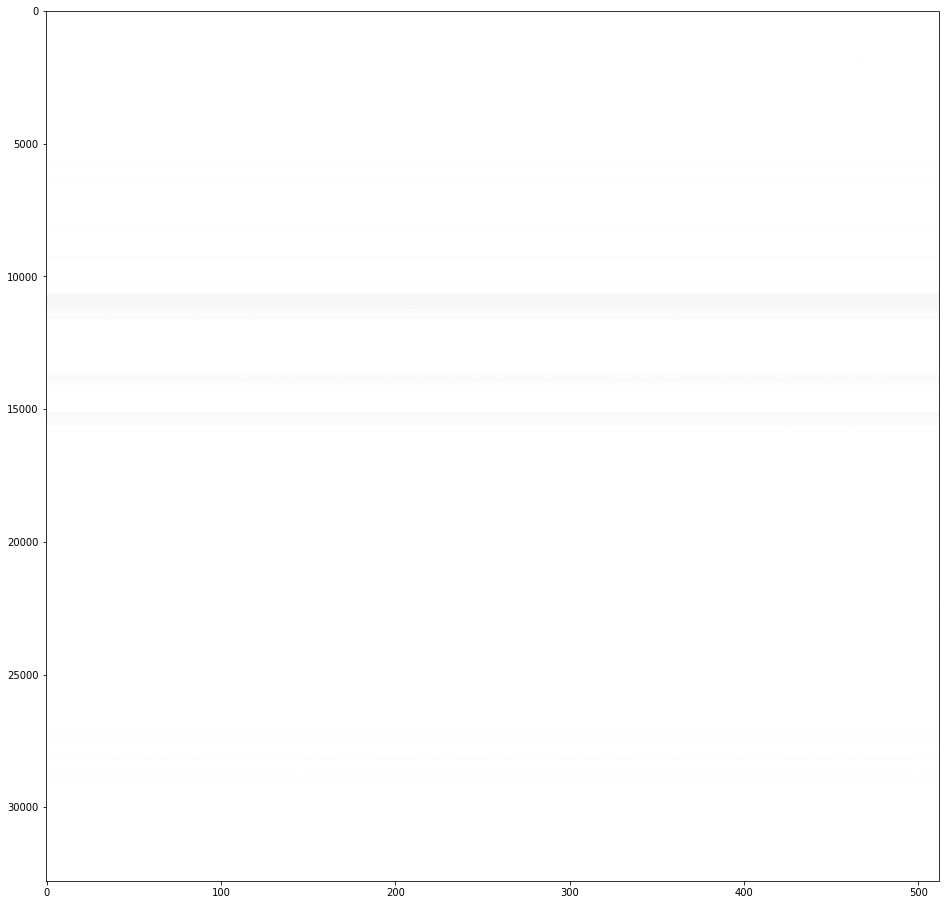

In [46]:
plt.figure(figsize=(16,16))
plt.imshow(normalized_new_data[0,:,:],cmap='binary',aspect='auto')
#help(np.)
#plt.tick_params(axis='x', which='major', labelsize=100)
#plt.xlim(0,32768)

In [3]:
start = "arochime-invpfbB0329+54_32768chan3ntbin"
fold = "foldspec_2018-08-16T10:"
icount = "icount_2018-08-16T10:"
end = ".000+30.000000000000004sec"

#final code will look something like:
#need to add plotting line, need to add second for loop for strings with :00 instead of :30
# i = 0
# for filename in filenames:
#     fold = np.load(start+fold+str(i+38)+":"+str(30)+end+".npy")
#     count = np.load(start+icount+str(i+38)+":"+str(30)+end+".npy")
#     norm = normalize(fold,count)
#     #plotting line
#     plt.savefig(start+fold+str(i+38)+":"+str(30)+end+".png")
#     i = i+1
    
test = np.load(start+fold+str(38)+":"+str(30)+end+".npy")

In [4]:
#what metadata reads:
    #arochime - data from arochime
    #invpfb - something specific to arochime???????
    #B0329+54 - pulsar name
    #32768 - number of entries in the frequency axis
    #chan3t - ???????????
    #foldspec/icount - folded pulse signals or icount data
    #_2018_08-16 - date at which data was taken
    #T - time
    #10:38:30.00 - 10 O'clock and 38 minutes and 30 seconds
    #30.000000000000004sec - data taken over 30 second interval?????????
    #.npy - filetype
data1 = np.load("arochime-invpfbB0329+54_32768chan3ntbinfoldspec_2018-08-16T10:38:30.000+30.000000000000004sec.npy")
data2 = np.load("arochime-invpfbB0329+54_32768chan3ntbinicount_2018-08-16T10:38:30.000+30.000000000000004sec.npy")
data3 = np.load("arochime-invpfbB0329+54_32768chan3ntbinfoldspec_2018-08-16T10:39:30.000+30.000000000000004sec.npy")
#data4 = np.load("arochime-invpfbB0329+54_32768chan3ntbinicount_2018-08-16T10:39:00.000+30.000000000000004sec.npy")

In [5]:
new_data = normalize(data1,data2)
#print(new_data[0,0,:,0]) #phase x
#print(new_data[0,:,0,0]) #freuecy y
#plt.plot(new_data[0,0,:,0],new_data[0,:,0,0])

In [6]:
ndata = np.zeros_like(data2)
ndata2 = np.zeros_like(data1)

for i in range(len(data1[:,:,:])):
    ndata2[:,:,:,i] = data1[:,:,:,i]/data2[:,:,:]

#print(ndata2)

In [ ]:
#################### EVERYTHING BELOW IS SCRATCH WORK ############################

In [30]:
print(Array.shape)

(2, 32768)


In [7]:
# Array = np.vstack((data2[0,:,0],data1[0,:,0,0]))
# print(Array.shape)
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
        for k in range(len(data1[0,0,:,0])):
            Array = np.vstack((data2[i,:,j],data1[i,:,k,0]))
            plt.imshow(Array,cmap='viridis')
    #plt.xlim(237,240)
plt.savefig('fig1.1.png')
%time

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f3d2a0f2af0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
Array = np.vstack((data2[0,:,0],data1[0,:,0,0]))
print(Array.shape)
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
        for k in range(len(data1[0,0,:,0])):
            Array = np.vstack((data2[i,:,j],data1[i,:,k,0]))
            plt.imshow(Array,cmap='viridis')
    #plt.xlim(237,240)
plt.savefig('fig1.1.png')
%time

(2, 32768)


KeyboardInterrupt: 

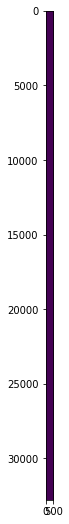

In [27]:
new_data = normalize(data1,data2)
X,Y = new_data[0,0,:,0],new_data[0,:,0,0]
plt.figure(figsize=(16,9))
#plt.imshow(new_data[0,1,:,0])
i = 0
j = 0
k = 0
for i in range(len(data1[:,0,0,0])):
    for j in range(len(data1[0,0,0,:])):
        plt.imshow(new_data[i,:,:,j])

# plt.imshow()

ValueError: array([20.894543, 22.04368 , 23.128796, ..., 35.283733, 35.07841 ,
       34.861423], dtype=float32) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

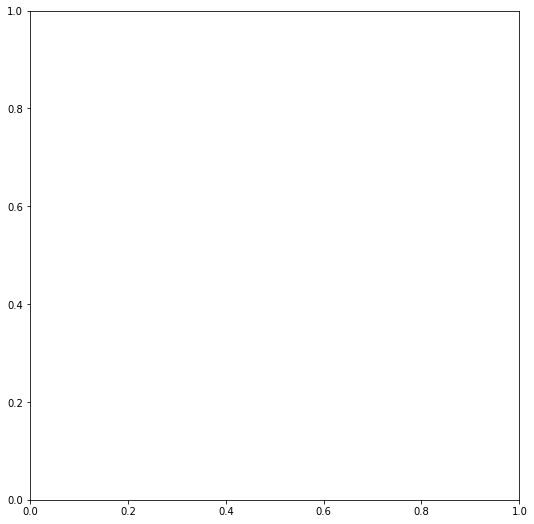

In [12]:
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
        plt.imshow(data2[i,:,j],data1[i,:,j,0])
    #plt.xlim(237,240)
plt.savefig('fig1.1.png')
%time

In [15]:
i = 0
for j in range(38,59):
    fold = np.load("arochime-invpfbB0329+54_32768chan3ntbinfoldspec_2018-08-16T10:"+str(39+i)+":00.000+30.000000000000004sec.npy")
    print(fold.shape)
    i = i+1

(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)


In [13]:
i = 0
for j in range(38,59):
    fold = np.load("arochime-invpfbB0329+54_32768chan3ntbinfoldspec_2018-08-16T10:"+str(38+i)+":30.000+30.000000000000004sec.npy")
    print(fold.shape)
    i = i+1

(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)
(3, 32768, 512, 4)


In [8]:
data3.shape

(3, 32768, 512, 4)

In [45]:
len(data1)
print(data1[0,:,0,0])
#print(data1[0,0,:,0])
print(data1[:,0,1,0])

[20.894543 22.04368  23.128796 ... 35.283733 35.07841  34.861423]
[19.661644 20.953207 16.106157]


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs


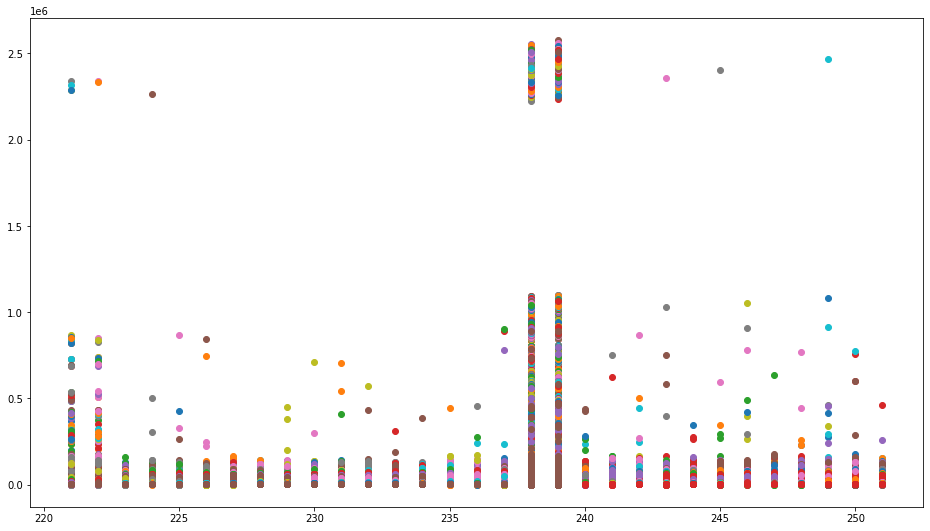

In [70]:
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
            plt.plot(data2[i,:,j],data1[i,:,j,0], 'o')
    #plt.xlim(237,240)
plt.savefig('fig1.png')
%time

In [83]:
%time
#test1 = np.zeros_like(data1)
interm = np.zeros_like(data1)
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
        test1[i,:,j,0] = test1[i,:,j,0]+data1[i,:,j,0]
    #plt.xlim(237,240)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 19.1 µs


NameError: name 'test1e' is not defined

In [86]:
%time
#test1 = np.zeros_like(data1)
test_01 = np.zeros(len(data1[0,:,0,0]))
interm = np.zeros_like(data1)
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
        test_01 = test_01+data1[i,:,j,0]
    #plt.xlim(237,240)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs


32768

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.78 µs


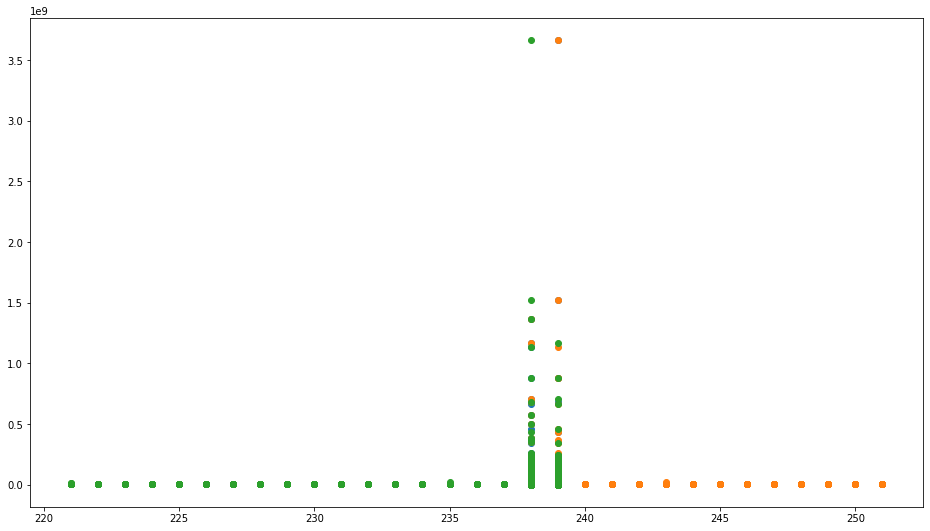

In [89]:
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    plt.plot(data2[i,:,0],test_01, 'o')
plt.savefig('fig2.png')
%time

In [82]:
print(len(test1[0,0,:,0]))

512


In [ ]:
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    plt.plot(data2[i,:,j],test1[i,:,j,0], 'o')
plt.savefig('fig2.png')
%time